In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.fft

In [ ]:
b = 60
w0 = np.pi * 40
v0 = 0
t0 = -0.05
tn = 0.05
N = int((tn - t0) / 0.002)
epsi = [] # шум
ti = []
si = []

In [ ]:
for i in range(N):
  epsi += [np.random.normal(0, 0 + i*0.002, 1)]

In [ ]:
for i in range(N):
  ti += [-0.05 + i*0.002]
  si += [np.exp(-(b * ti[i])** 2) * np.cos(w0 * ti[i] + v0)]

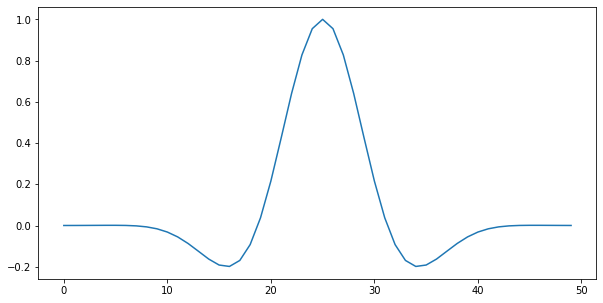

In [ ]:
plt.figure(figsize=(10,5)) #чистый сигнал
plt.plot(si)
plt.show()

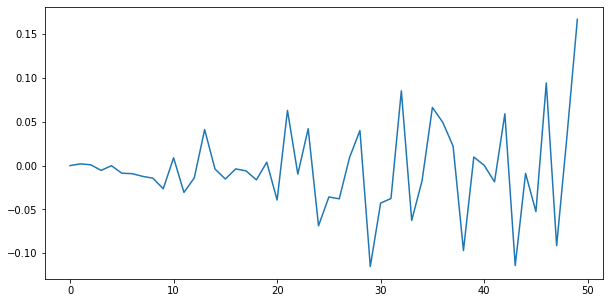

In [ ]:
plt.figure(figsize=(10,5)) # шум
plt.plot(epsi)
plt.show()

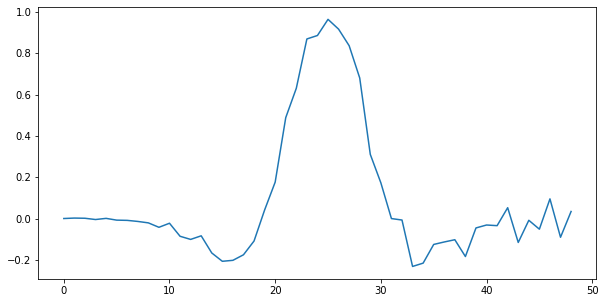

In [ ]:
y = np.zeros(N-1)
for i in range(N-1):
  y[i] = np.array([epsi[i] + si[i]])
plt.figure(figsize=(10,5)) # входной сигнал
plt.plot(y)
plt.show()

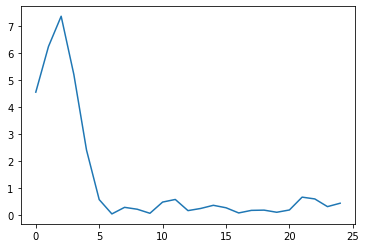

In [ ]:
ACHy = scipy.fft.rfft(y)
plt.plot(abs(ACHy))

In [ ]:
f1 = 3
f2 = 8
h = np.zeros(N-1) # СИГНАЛ
for i in range(N-1):
  h[i] = (1/(2*m.pi*(i+1)*0.002)) * (m.sin(2*m.pi*f1*(i+1)*0.002) + m.sin(2*m.pi*f2*(i+1)*0.002))/(1-4*((i+1) ** 2) * (0.002 ** 2) * (f2-f1) ** 2)

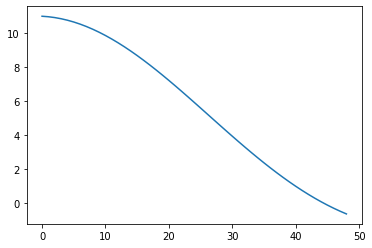

In [ ]:
plt.plot(h)

25


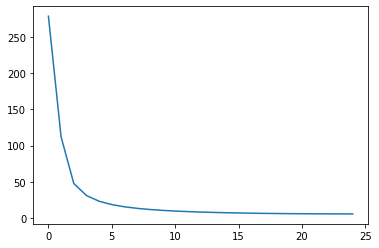

In [ ]:
ACHh = scipy.fft.rfft(h) # АЧХ СИГНАЛА
plt.plot(abs(ACHh))

In [ ]:
w1 = np.zeros(N-1) #бартлетта
w2 = np.zeros(N-1) #хеннинг
w3 = np.zeros(N-1) #хемминг
w4 = np.zeros(N-1) #блэкмана
for i in range(N-1):
  if (i<=int((N-1)/2)):
    w1[i] = 2*i/(N-1)
  else:
    w1[i] = 2 - 2*i/(N-1)
  w2[i] = 0.5 * (1 - np.cos((2*m.pi*i)/(N-1)))
  w3[i] = 0.54 - 0.46 * (np.cos((2*m.pi*i)/(N-1)))
  w4[i] = 0.42 - 0.5 * (np.cos((2*m.pi*i)/(N-1))) + 0.08*np.cos(4*m.pi*i/(N-1))

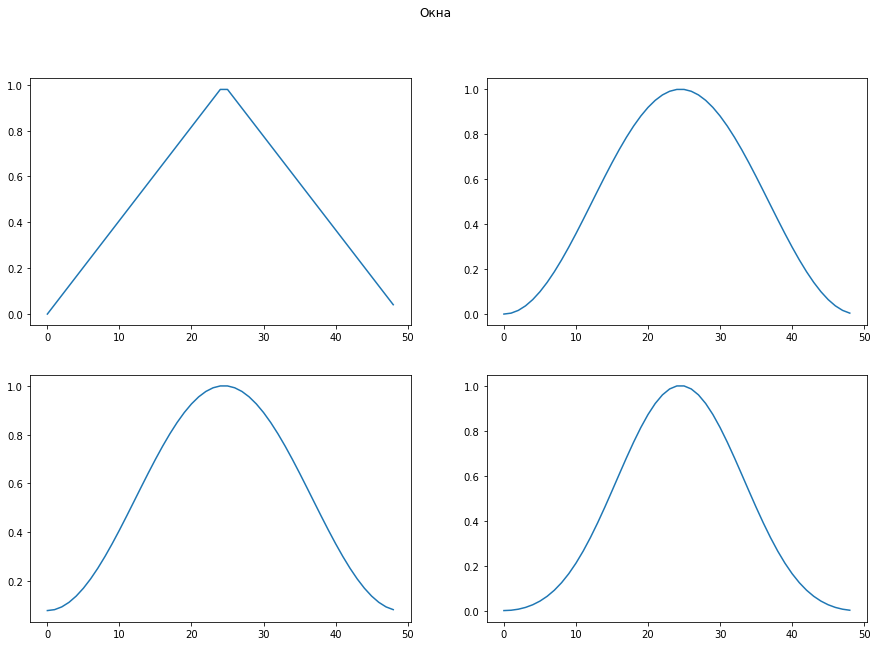

In [ ]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2 )
fig. suptitle('Окна')
axs[0, 0].plot(w1)
axs[0, 1].plot(w2)
axs[1, 0].plot(w3)
axs[1, 1].plot(w4)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [ ]:
# перемножение во временной области фильтра и окна
ACHhw1 = (scipy.fft.rfft(h * w1))
ACHhw2 = (scipy.fft.rfft(h * w2))
ACHhw3 = (scipy.fft.rfft(h * w3))
ACHhw4 = (scipy.fft.rfft(h * w4))

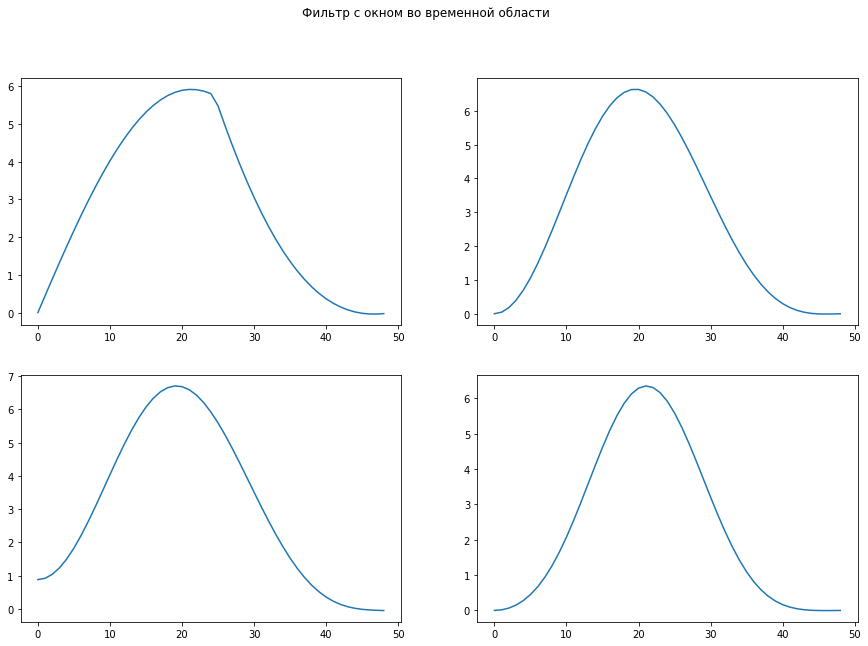

In [ ]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2 )
fig. suptitle('Фильтр с окном во временной области')
axs[0, 0].plot(h * w1) #бартлетта
axs[0, 1].plot(h * w2) #хеннинг
axs[1, 0].plot(h * w3) #хемминг
axs[1, 1].plot(h * w4) #блэкмана
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

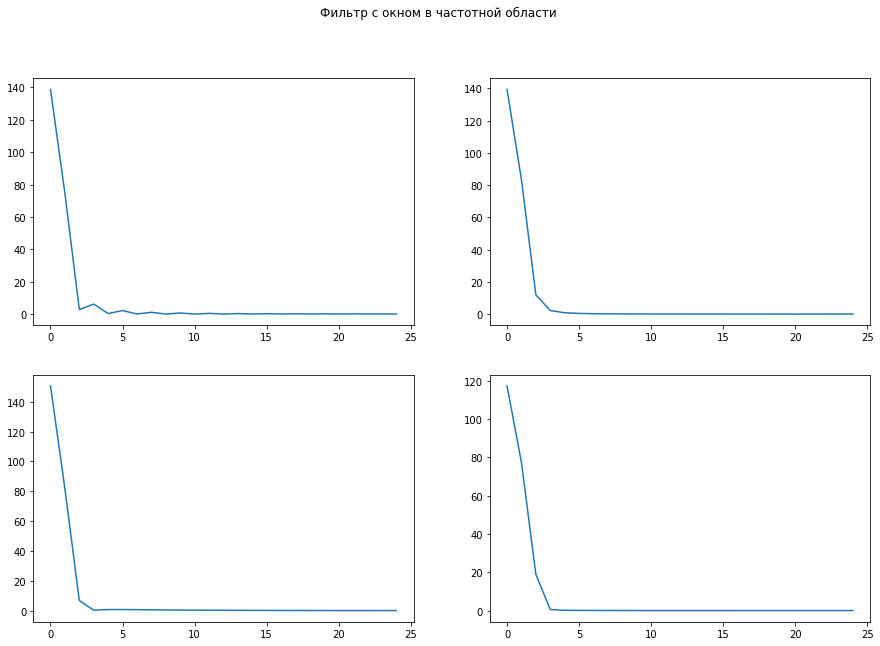

In [ ]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2 )
fig. suptitle('Фильтр с окном в частотной области')
axs[0, 0].plot(abs(ACHhw1)) #бартлетта
axs[0, 1].plot(abs(ACHhw2)) #хеннинг
axs[1, 0].plot(abs(ACHhw3)) #хемминг
axs[1, 1].plot(abs(ACHhw4)) #блэкмана
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [ ]:
# ВЫХОД ПОСЛЕ ФИЛЬТРАЦИИ
Y1 = scipy.fft.irfft(ACHy * ACHhw1)
Y2 = scipy.fft.irfft(ACHy * ACHhw2)
Y3 = scipy.fft.irfft(ACHy * ACHhw3)
Y4 = scipy.fft.irfft(ACHy * ACHhw4)

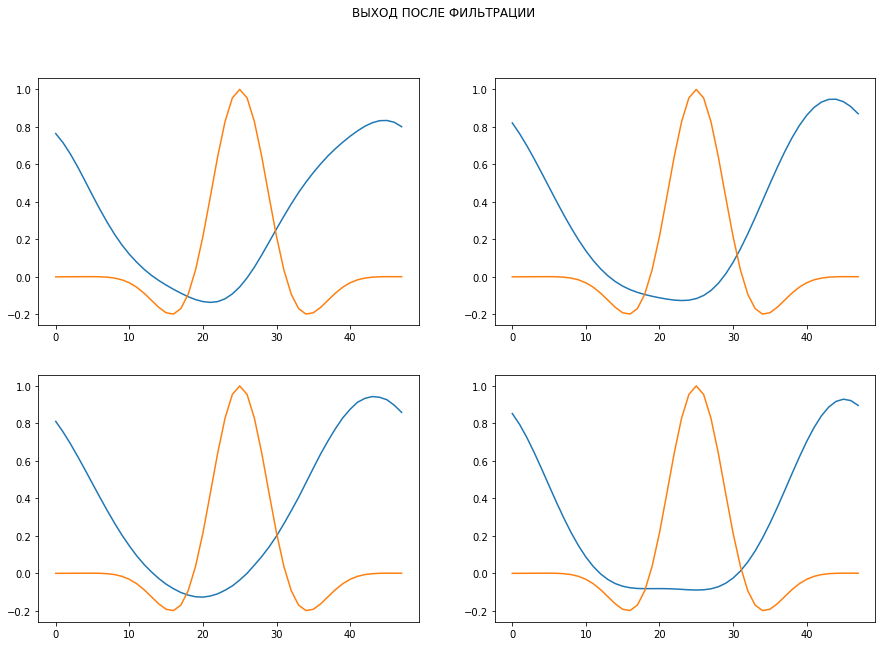

In [ ]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2 )
fig. suptitle('ВЫХОД ПОСЛЕ ФИЛЬТРАЦИИ')
axs[0, 0].plot(Y1/40) #бартлетта
axs[0, 0].plot(si[:48])
axs[0, 1].plot(Y2/40) #хеннинг
axs[0, 1].plot(si[:48])
axs[1, 0].plot(Y3/40) #хемминг
axs[1, 0].plot(si[:48])
axs[1, 1].plot(Y4/40) #блэкмана
axs[1, 1].plot(si[:48])
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [ ]:
#СВЁРТКА ПРИ ПОМОЩИ NUMPY

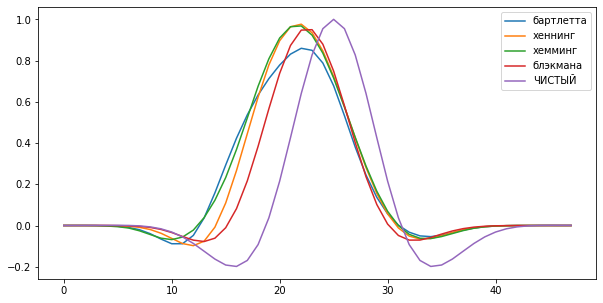

In [ ]:
Y1 = np.convolve(y, h * w1 , mode='full')/38
Y2 = np.convolve(y, h * w2, mode='full')/38
Y3 = np.convolve(y, h * w3, mode='full')/38
Y4 = np.convolve(y, h * w4, mode='full')/38
Y11 = Y1[1::2]
Y21 = Y2[1::2]
Y31 = Y3[1::2]
Y41 = Y4[1::2]
plt.figure(figsize=(10,5)) # входной сигнал
plt.plot(Y11, label = 'бартлетта')
plt.plot(Y21, label = 'хеннинг')
plt.plot(Y31, label = 'хемминг')
plt.plot(Y41, label = 'блэкмана')
plt.plot(si[:48], label = 'ЧИСТЫЙ')
plt.legend()
plt.show()


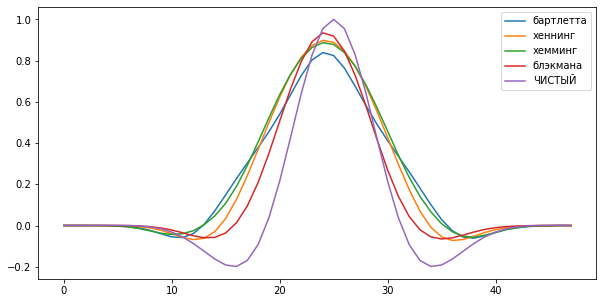

In [ ]:
# свёртка с окном
Y1 = np.convolve(y, w1 , mode='full')/6
Y2 = np.convolve(y, w2, mode='full')/6
Y3 = np.convolve(y, w3, mode='full')/6
Y4 = np.convolve(y, w4, mode='full')/6
Y11 = Y1[1::2]
Y21 = Y2[1::2]
Y31 = Y3[1::2]
Y41 = Y4[1::2]
plt.figure(figsize=(10,5)) # входной сигнал
plt.plot(Y11, label = 'бартлетта')
plt.plot(Y21, label = 'хеннинг')
plt.plot(Y31, label = 'хемминг')
plt.plot(Y41, label = 'блэкмана')
plt.plot(si[:48], label = 'ЧИСТЫЙ')
plt.legend()
plt.show()

In [ ]:
#простой фильтр с преобразованием в частотной области
f1 = 3
f2 = 8
ACHH = np.zeros(int(N/2)+1) 
for i in range(int(N/2)): 
  if (i<=f2):
    ACHH[i] = 1
  else:
    ACHH[i] = 0
H = scipy.fft.irfft(ACHH)[:49]

In [ ]:
ACHHw1 = (scipy.fft.rfft(H * w1))
ACHHw2 = (scipy.fft.rfft(H * w2))
ACHHw3 = (scipy.fft.rfft(H * w3))
ACHHw4 = (scipy.fft.rfft(H * w4))

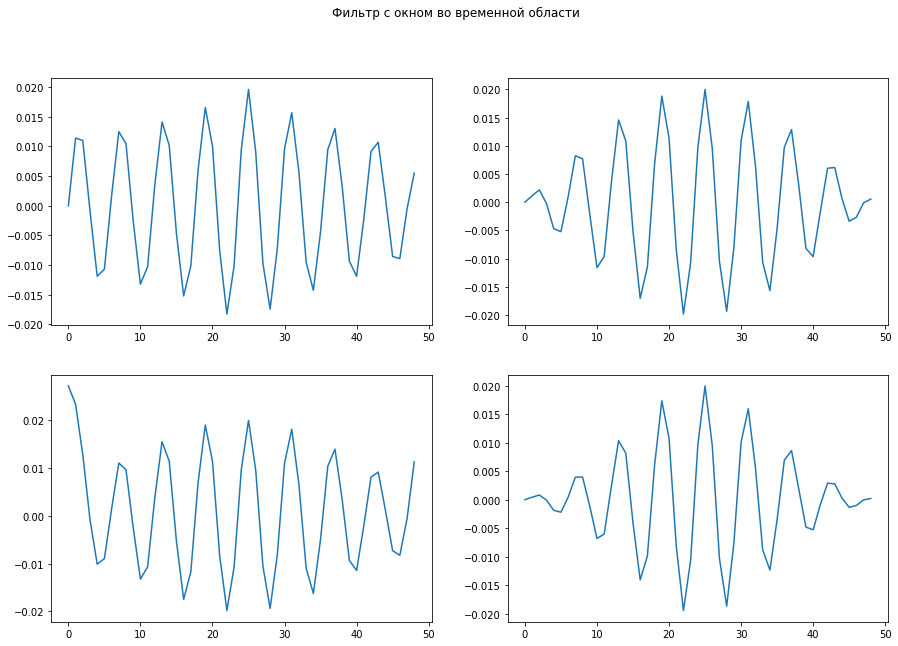

In [ ]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2 )
fig. suptitle('Фильтр с окном во временной области')
axs[0, 0].plot(H * w1) #бартлетта
axs[0, 1].plot(H * w2) #хеннинг
axs[1, 0].plot(H * w3) #хемминг
axs[1, 1].plot(H * w4) #блэкмана
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [ ]:
Y1 = scipy.fft.irfft(ACHy * ACHHw1)*5000
Y2 = scipy.fft.irfft(ACHy * ACHHw2)*5000
Y3 = scipy.fft.irfft(ACHy * ACHHw3)*700
Y4 = scipy.fft.irfft(ACHy * ACHHw4)*5000

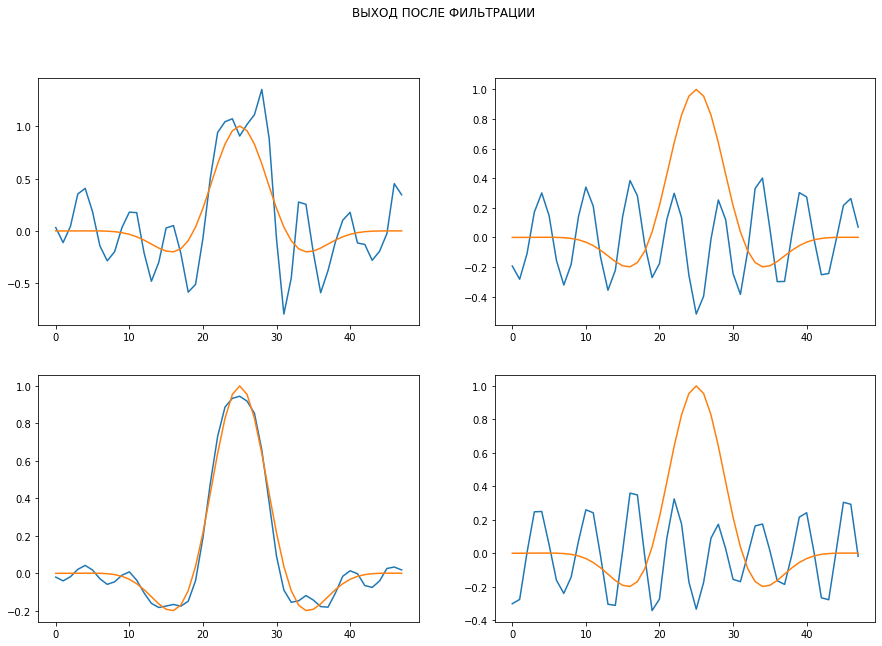

In [ ]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2 )
fig. suptitle('ВЫХОД ПОСЛЕ ФИЛЬТРАЦИИ')
axs[0, 0].plot(Y1/40) #бартлетта
axs[0, 0].plot(si[:48])
axs[0, 1].plot(Y2/40) #хеннинг
axs[0, 1].plot(si[:48])
axs[1, 0].plot(Y3/40) #хемминг
axs[1, 0].plot(si[:48])
axs[1, 1].plot(Y4/40) #блэкмана
axs[1, 1].plot(si[:48])
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [ ]:
Y1 = np.convolve(y, H * w1 , mode='full')/38
Y2 = np.convolve(y, H * w2, mode='full')/38
Y3 = np.convolve(y, H * w3, mode='full')/38
Y4 = np.convolve(y, H * w4, mode='full')/38
Y11 = Y1[1::2]
Y21 = Y2[1::2]
Y31 = Y3[1::2]
Y41 = Y4[1::2]
plt.figure(figsize=(10,5)) # входной сигнал
plt.plot(Y11, label = 'бартлетта')
plt.plot(Y21, label = 'хеннинг')
plt.plot(Y31, label = 'хемминг')
plt.plot(Y41, label = 'блэкмана')
plt.plot(si[:48], label = 'ЧИСТЫЙ')
plt.legend()
plt.show()


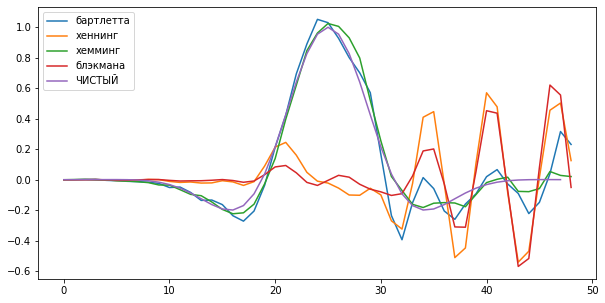

In [ ]:
#простой фильтр СВЁРТКА ПРИ ПОМОЩИ NUMPY 
Y1 = np.convolve(y, H * w1 , mode='full')*90
Y2 = np.convolve(y, H * w2, mode='full')*250
Y3 = np.convolve(y, H * w3, mode='full')*20
Y4 = np.convolve(y, H * w4, mode='full')*250
Y11 = Y1[:49]
Y21 = Y2[:49]
Y31 = Y3[:49]
Y41 = Y4[:49]
plt.figure(figsize=(10,5)) # входной сигнал
plt.plot(Y11, label = 'бартлетта')
plt.plot(Y21, label = 'хеннинг')
plt.plot(Y31, label = 'хемминг')
plt.plot(Y41, label = 'блэкмана')
plt.plot(si[:48], label = 'ЧИСТЫЙ')
plt.legend()
plt.show()